<a href="https://www.kaggle.com/code/rajatraj0502/prime-ministers-of-india?scriptVersionId=142154161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prime-ministers-of-india/Indain PM.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_pm = pd.read_csv('/kaggle/input/prime-ministers-of-india/Indain PM.csv')

# Display the first few rows of the dataset
df_pm.head()


,S/No,Name,Tenure,Duration,Duration in Days,Political party
0,1,Jawaharlal Nehru,15-08-1947 to 27-05-1964,"16years, 286 days",6130,Indian National Congress
1,2,Gulzarilal Nanda,27-05-1964 to 09-06-1964,13 days,13,Indian National Congress
2,3,Lal Bahadur Shastri,09-06-1964 to 11-01-1966,"1 year, 216 days",581,Indian National Congress
3,4,Gulzarilal Nanda,11-01-1966 to 24-01-1966,13 days,13,Indian National Congress
4,5,Indira Gandhi,24-01-1966 to 24-03-1977,"11years, 59 days",4076,Indian National Congress


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

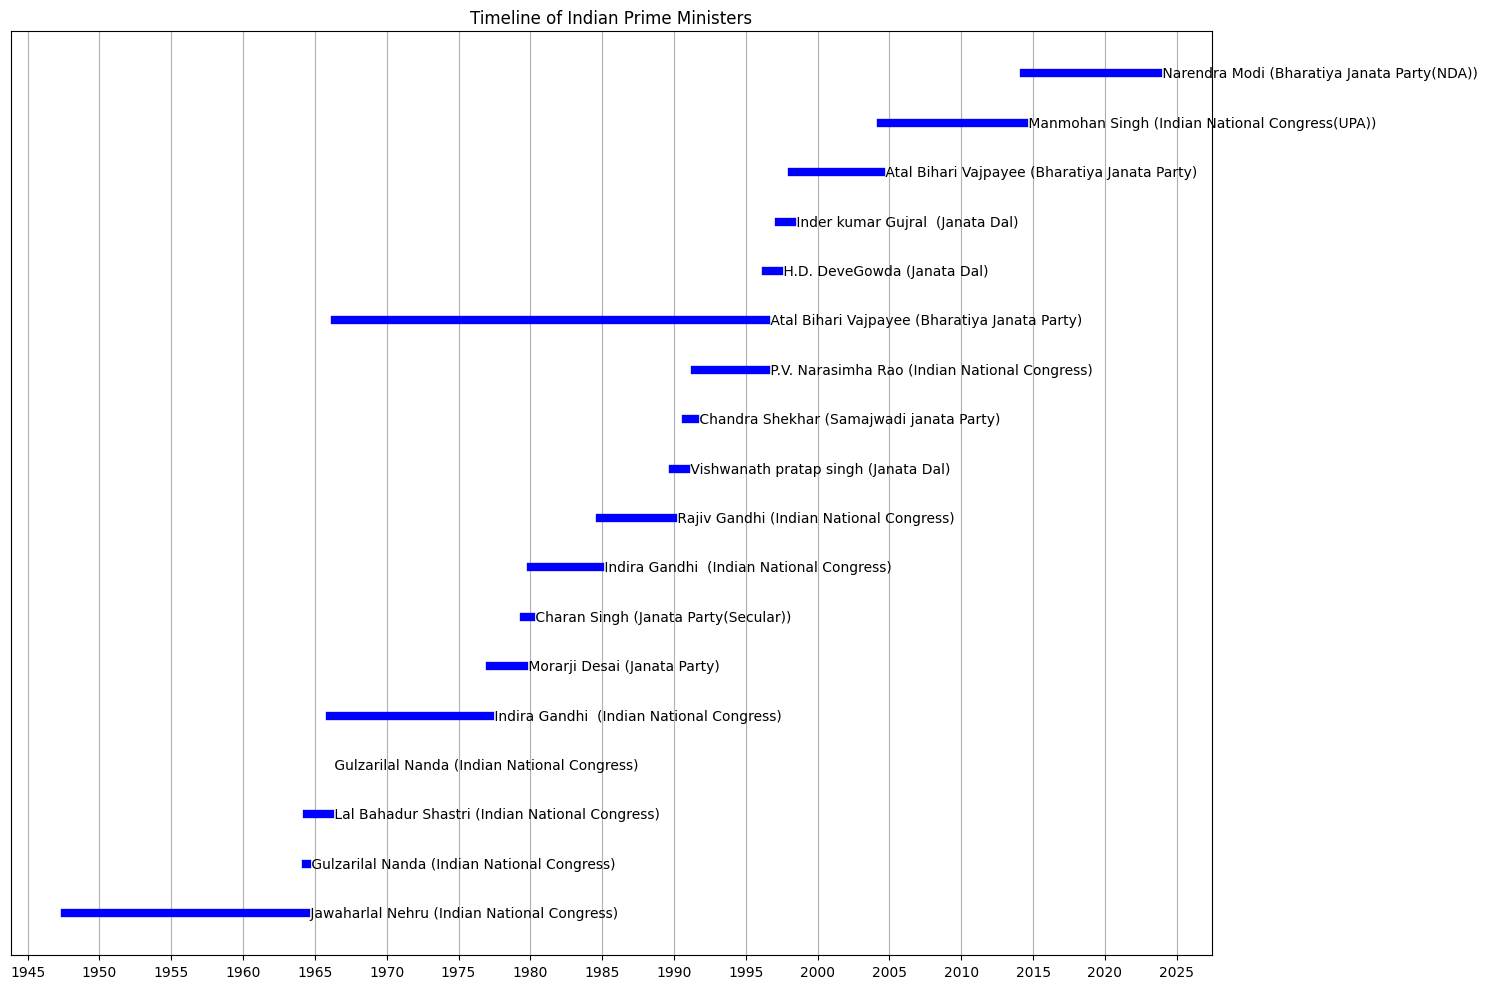

In [4]:
# Ensure the 'Start Date' column is derived from the 'Tenure' column
df_pm['Start Date'] = df_pm['Tenure'].apply(lambda x: datetime.datetime.strptime(x.split(" to ")[0], '%d-%m-%Y'))
df_pm['End Date'] = df_pm['Tenure'].apply(lambda x: datetime.datetime.today() if x.split(" to ")[1] == 'Incumbent' else datetime.datetime.strptime(x.split(" to ")[1], '%d-%m-%Y'))
# Sorting the dataframe based on Start Date
df_pm = df_pm.sort_values(by='Start Date')

# Plotting the timeline
plt.figure(figsize=(15, 10))
for index, row in df_pm.iterrows():
    plt.plot([row['Start Date'], row['End Date']], [index, index], color='blue', linewidth=6)
    plt.text(row['End Date'], index, ' ' + row['Name'] + ' (' + row['Political party'] + ')', verticalalignment='center', fontsize=10)

plt.yticks([])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.title('Timeline of Indian Prime Ministers')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


**Here's the timeline plot showing the tenure of each Indian Prime Minister. Each horizontal line represents the tenure of a Prime Minister, with their name and political party mentioned at the end of the line.**

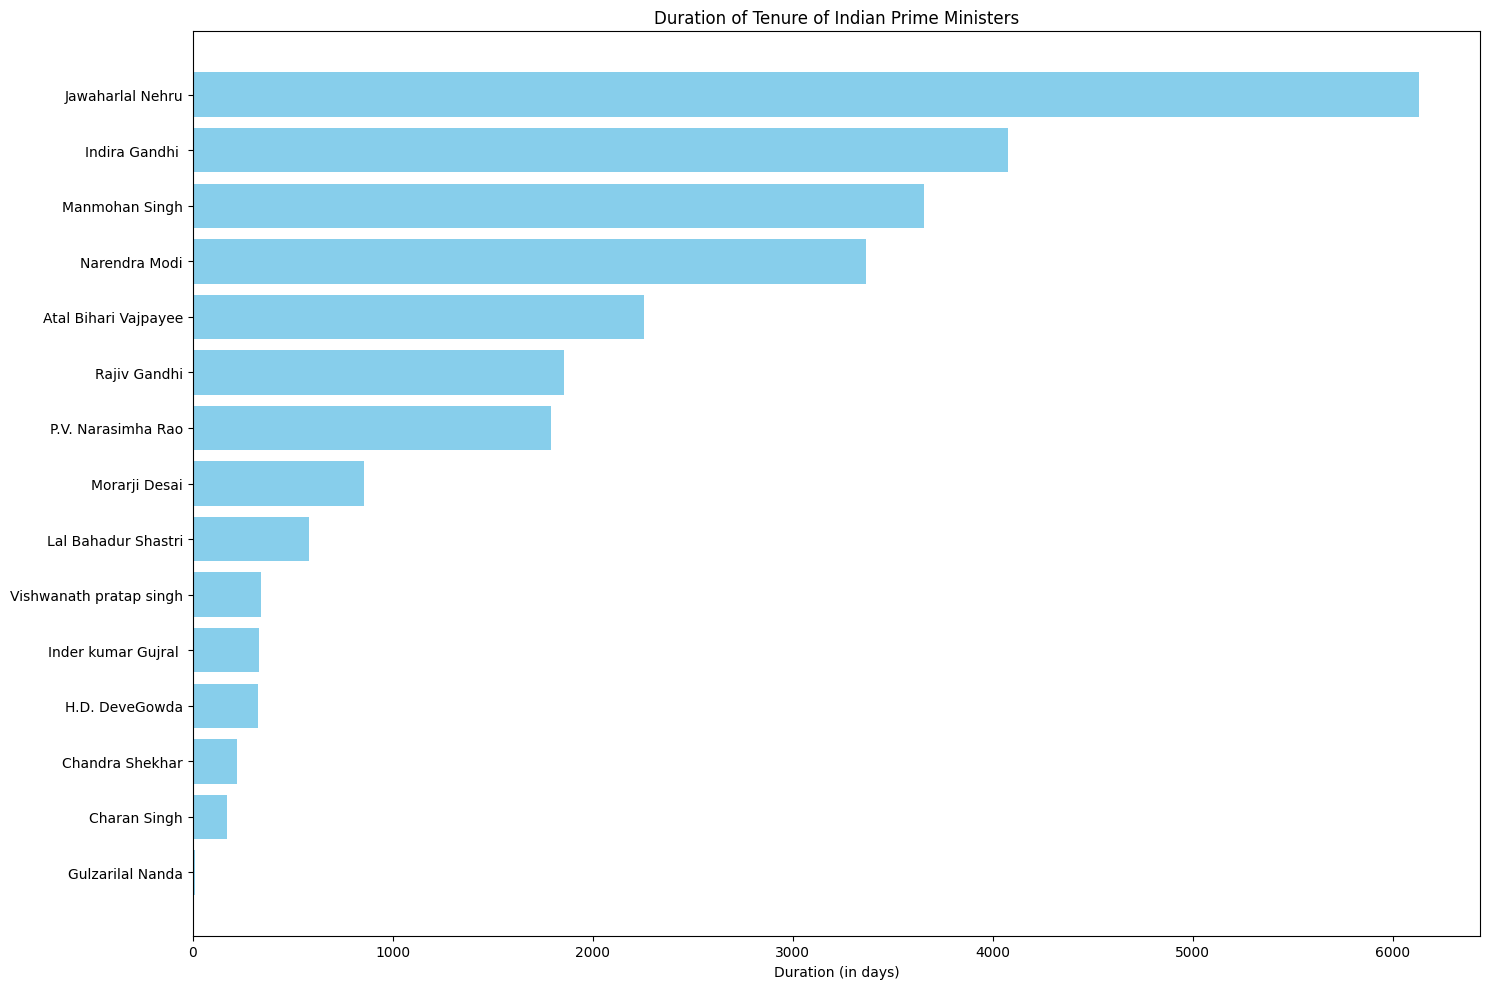

In [5]:
# Bar plot of duration in days
plt.figure(figsize=(15, 10))
df_pm_sorted = df_pm.sort_values(by='Duration in Days', ascending=False)
plt.barh(df_pm_sorted['Name'], df_pm_sorted['Duration in Days'], color='skyblue')
plt.xlabel('Duration (in days)')
plt.title('Duration of Tenure of Indian Prime Ministers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**The bar plot displays the duration (in days) of each Indian Prime Minister's tenure. The Prime Ministers are sorted based on the length of their tenure, with those serving the longest at the top.**

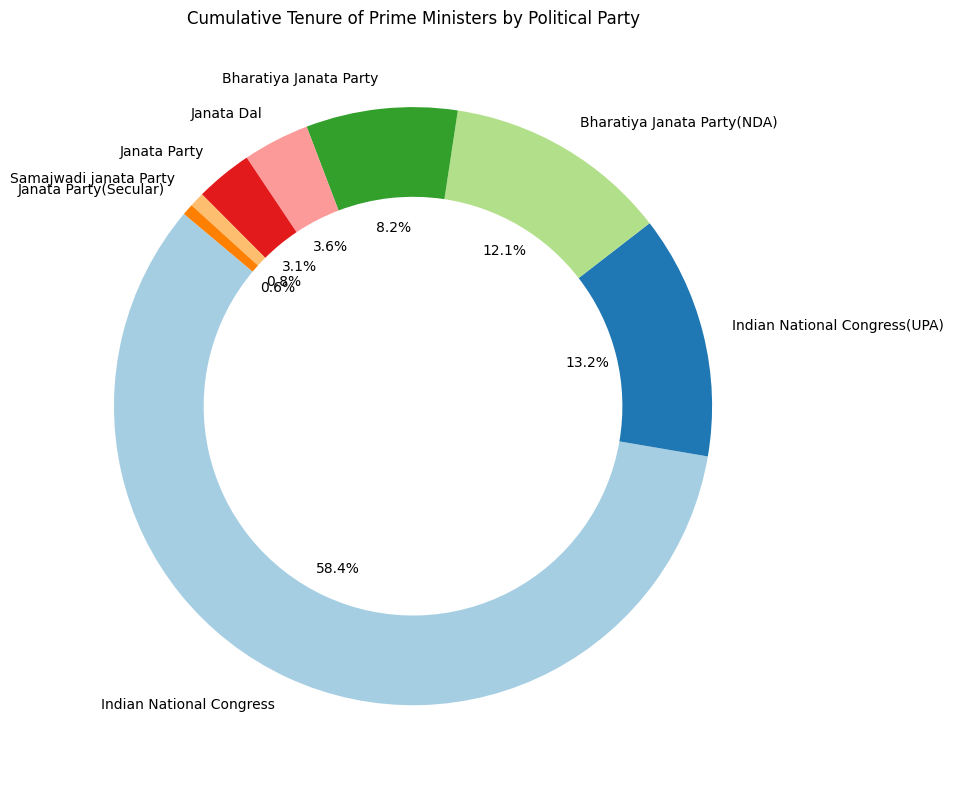

In [6]:
# Calculate cumulative duration for each political party
party_duration = df_pm.groupby('Political party')['Duration in Days'].sum().sort_values(ascending=False)

# Pie chart for cumulative duration of Prime Ministers from each political party
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(party_duration)))
plt.pie(party_duration, labels=party_duration.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Cumulative Tenure of Prime Ministers by Political Party')
plt.tight_layout()
plt.show()


**The pie chart displays the cumulative tenure of Prime Ministers categorized by their respective political parties. The chart provides a comparative view of how long Prime Ministers from each party have governed India.**

In [7]:
# Identifying the Prime Minister with the longest tenure
longest_tenure_pm = df_pm[df_pm['Duration in Days'] == df_pm['Duration in Days'].max()]

# Identifying the Prime Minister with the shortest tenure (excluding those with only a few days, which usually are interim PMs)
shortest_tenure_pm = df_pm[df_pm['Duration in Days'] > 10].nsmallest(1, 'Duration in Days')

longest_tenure_pm, shortest_tenure_pm[['Name', 'Duration ', 'Duration in Days', 'Political party']]


(   S/No              Name                    Tenure          Duration   \
 0     1  Jawaharlal Nehru  15-08-1947 to 27-05-1964  16years, 286 days   
 
    Duration in Days           Political party Start Date   End Date  
 0              6130  Indian National Congress 1947-08-15 1964-05-27  ,
                Name Duration   Duration in Days           Political party
 1  Gulzarilal Nanda   13 days                13  Indian National Congress)

**The Prime Minister with the longest tenure is:**

**Jawaharlal Nehru** from the Indian National Congress with a duration of 16 years and 286 days (6130 days in total).

The Prime Minister with the **shortest tenure** (excluding interim tenures of just a few days) is:

**Gulzarilal Nanda** from the Indian National Congress with a duration of 13 days.

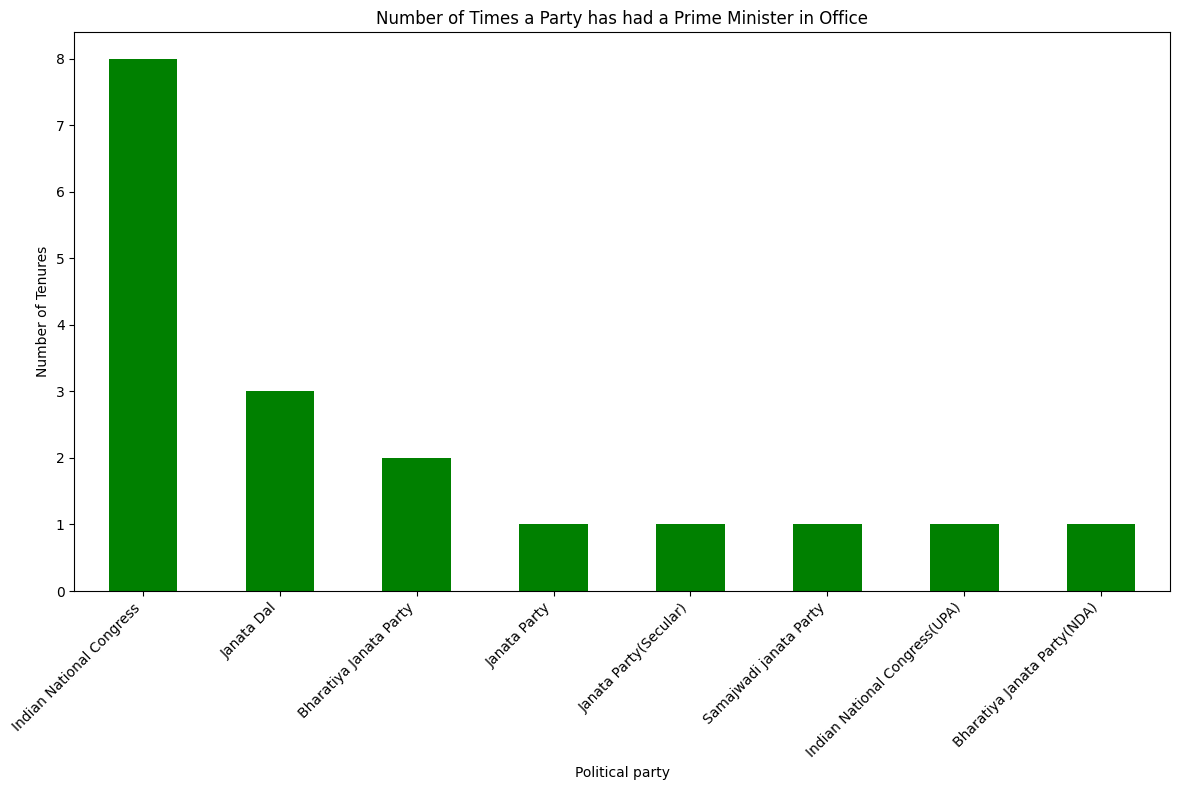

In [8]:
# Count of Prime Ministers from each political party
party_counts = df_pm['Political party'].value_counts()

# Bar chart for number of Prime Ministers from each political party
plt.figure(figsize=(12, 8))
party_counts.plot(kind='bar', color='green')
plt.ylabel('Number of Tenures')
plt.title('Number of Times a Party has had a Prime Minister in Office')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The bar chart illustrates the number of times each political party has had a Prime Minister in office. It's evident that the Indian National Congress has had the majority of tenures, followed by other parties.**

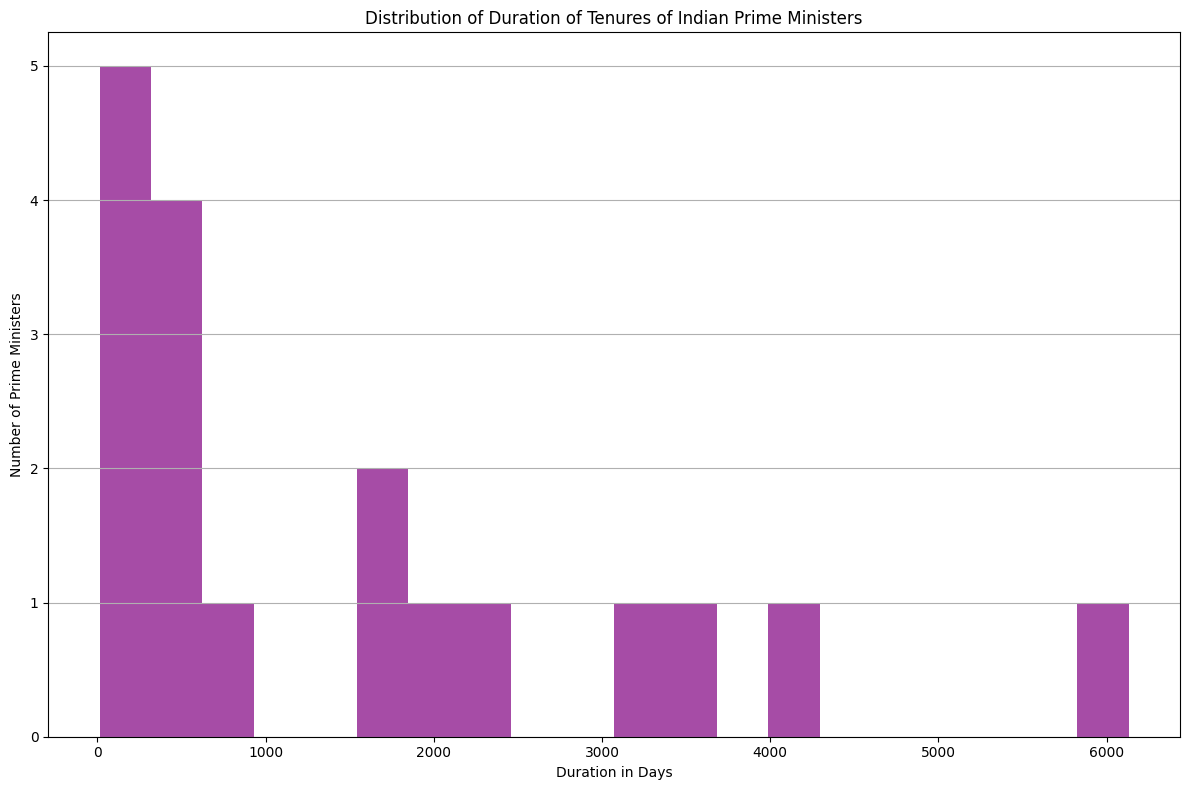

In [9]:
# Histogram for duration of tenures
plt.figure(figsize=(12, 8))
plt.hist(df_pm['Duration in Days'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Duration in Days')
plt.ylabel('Number of Prime Ministers')
plt.title('Distribution of Duration of Tenures of Indian Prime Ministers')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


**The histogram depicts the distribution of the duration of tenures of Indian Prime Ministers. Most of the tenures are clustered around the shorter durations, with a few longer tenures standing out.**

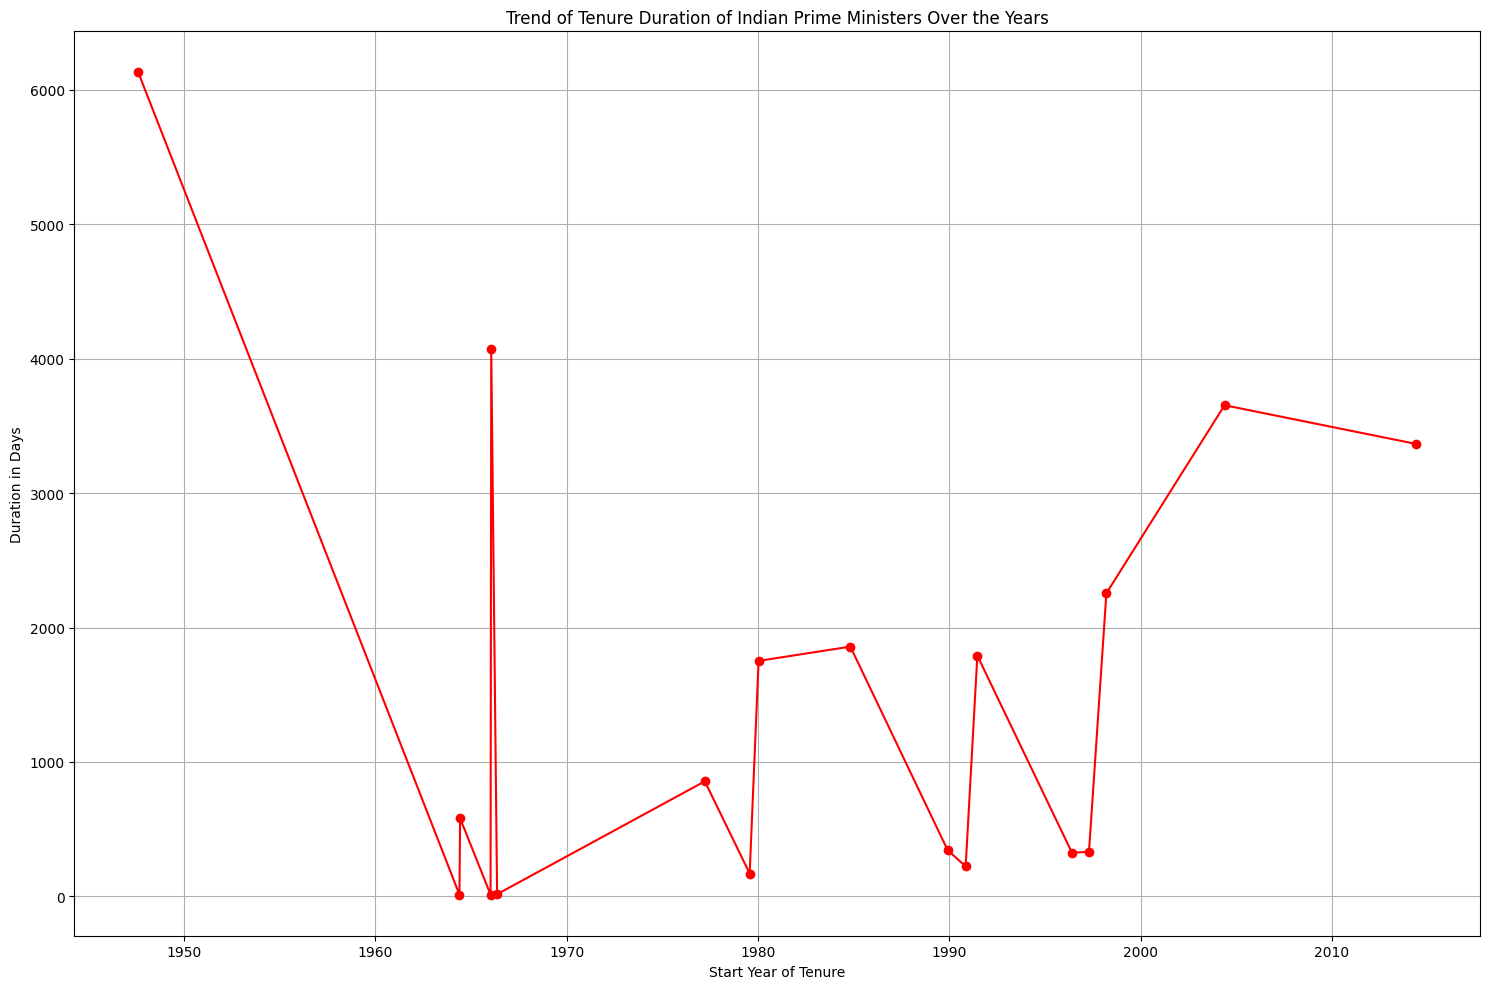

In [10]:
# Line plot of tenure duration over the years
plt.figure(figsize=(15, 10))
plt.plot(df_pm['Start Date'], df_pm['Duration in Days'], marker='o', color='red', linestyle='-')
plt.xlabel('Start Year of Tenure')
plt.ylabel('Duration in Days')
plt.title('Trend of Tenure Duration of Indian Prime Ministers Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()


**The line plot showcases the trend of tenure duration of Indian Prime Ministers over the years. It provides a visual representation of how the duration of tenures has varied since India's independence.**

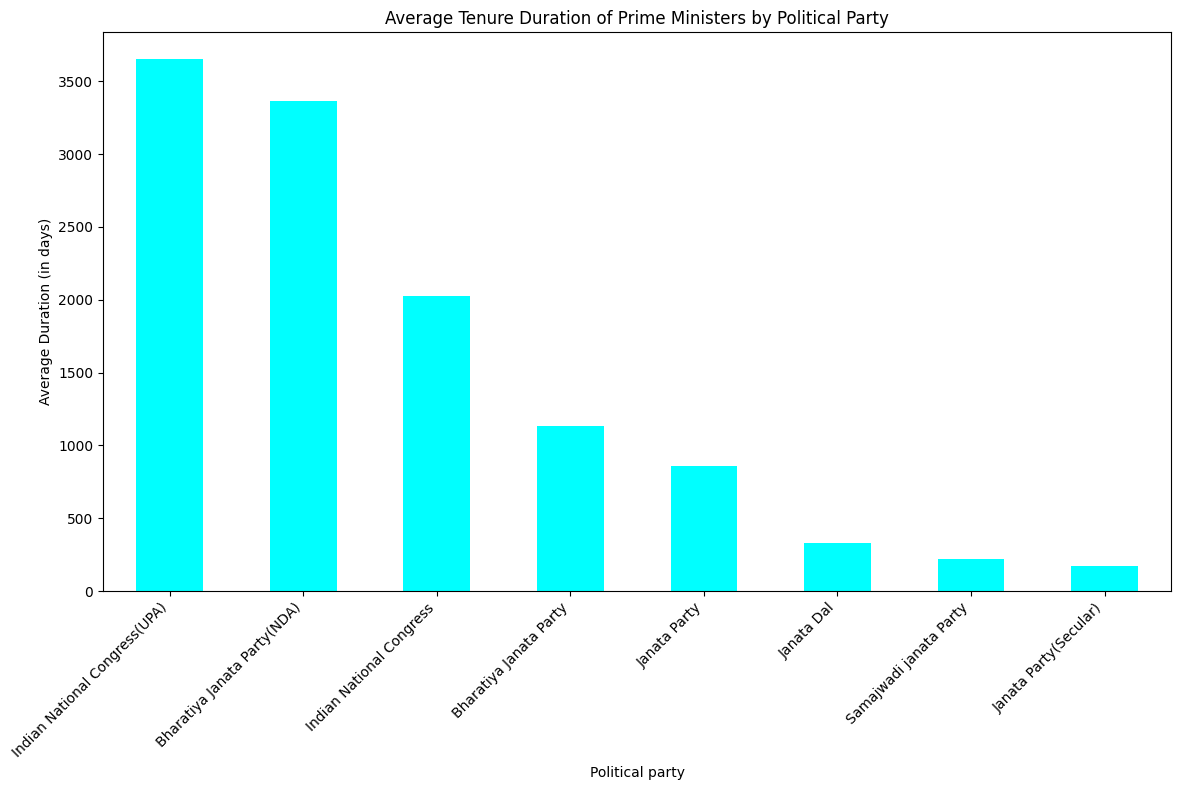

In [11]:
# Calculate average duration for each political party
party_avg_duration = df_pm.groupby('Political party')['Duration in Days'].mean().sort_values(ascending=False)

# Bar chart for average duration of Prime Ministers from each political party
plt.figure(figsize=(12, 8))
party_avg_duration.plot(kind='bar', color='cyan')
plt.ylabel('Average Duration (in days)')
plt.title('Average Tenure Duration of Prime Ministers by Political Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The bar chart represents the average tenure duration of Prime Ministers from each political party. This visualization offers insights into which parties, on average, have had Prime Ministers with longer tenures.**

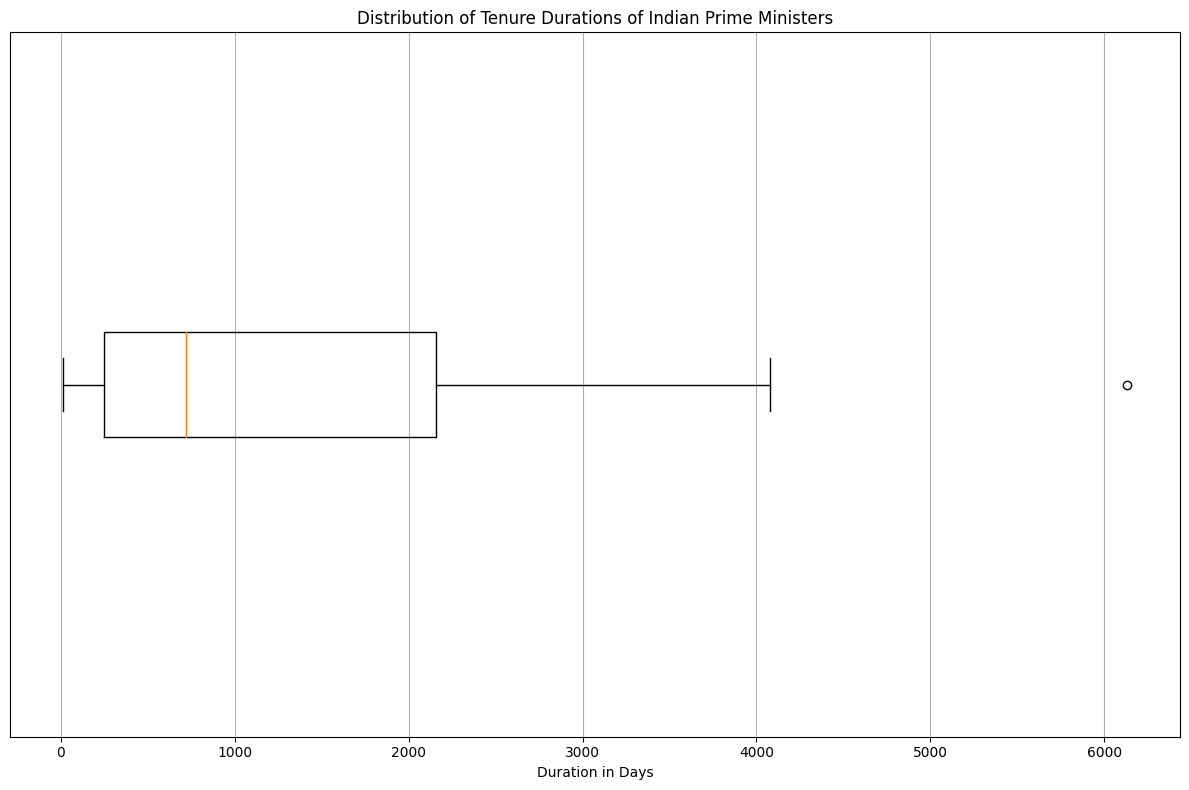

In [12]:
# Box plot for distribution of tenure durations
plt.figure(figsize=(12, 8))
plt.boxplot(df_pm['Duration in Days'], vert=False)
plt.xlabel('Duration in Days')
plt.title('Distribution of Tenure Durations of Indian Prime Ministers')
plt.yticks([])
plt.grid(axis='x')
plt.tight_layout()
plt.show()


**The box plot visualizes the distribution of tenure durations of Indian Prime Ministers:**

* The central line inside the box indicates the median duration.
* The edges of the box show the 1st and 3rd quartiles.
* The whiskers extend to cover the range of the data, excluding potential outliers.
* Outliers might be represented as individual points beyond the whiskers.

**From the plot, we can observe that while there's a considerable spread in the durations of Prime Ministers' tenures, most of them have tenures that are less than 3000 days (around 8 years), with a few notable exceptions.**

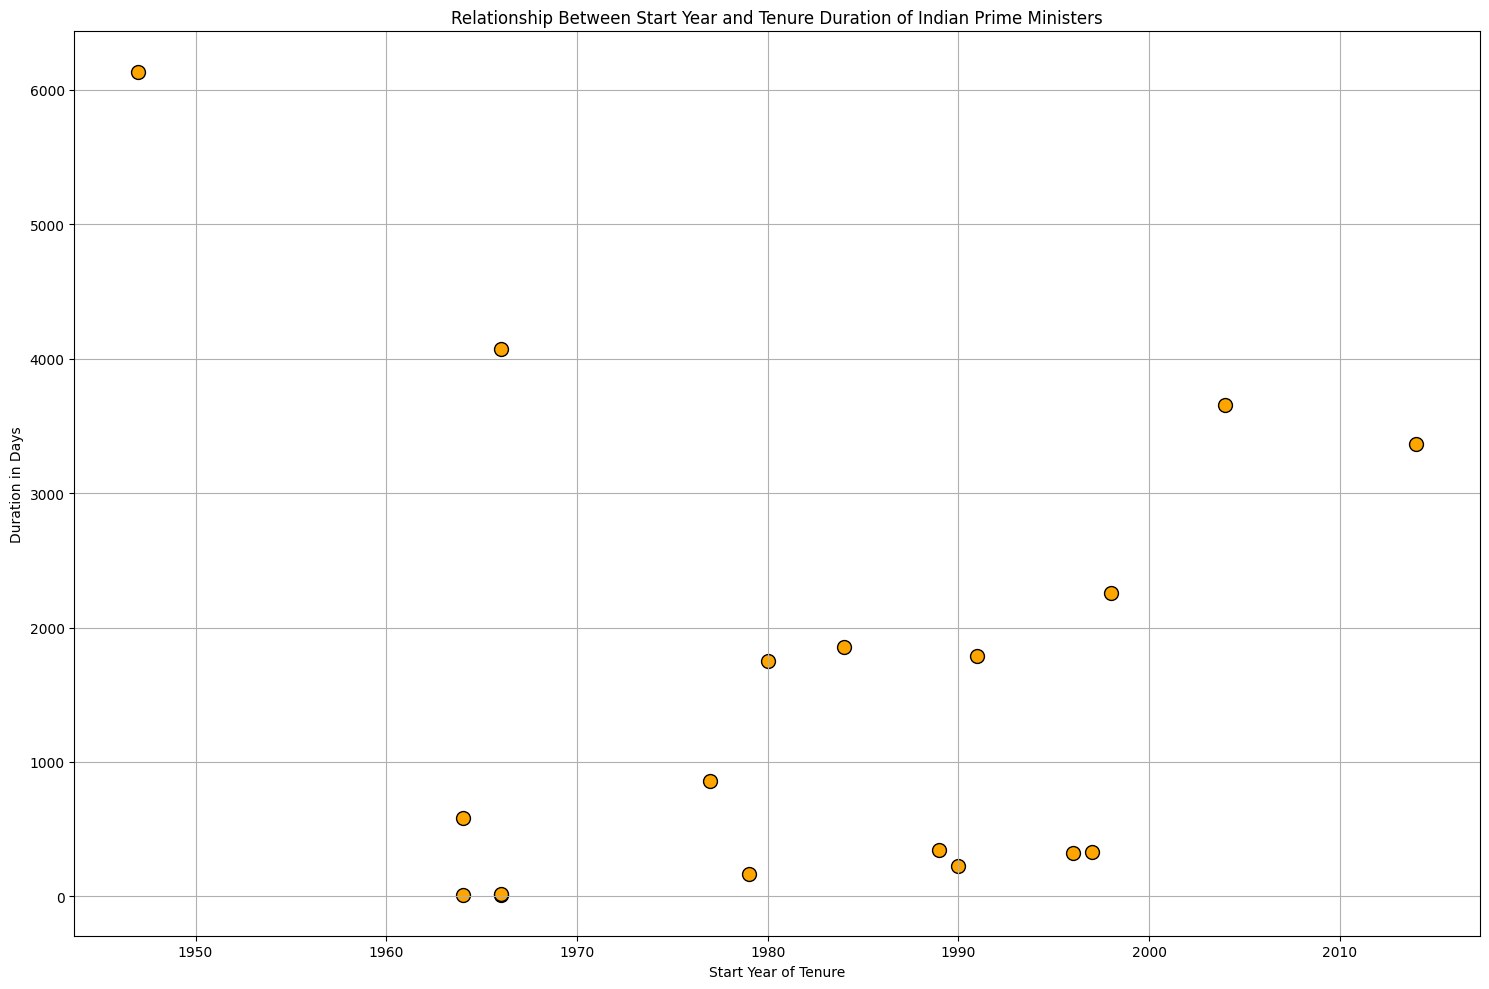

In [13]:
# Scatter plot of start year vs duration
plt.figure(figsize=(15, 10))
plt.scatter(df_pm['Start Date'].dt.year, df_pm['Duration in Days'], color='orange', s=100, edgecolors='black')
plt.xlabel('Start Year of Tenure')
plt.ylabel('Duration in Days')
plt.title('Relationship Between Start Year and Tenure Duration of Indian Prime Ministers')
plt.grid(True)
plt.tight_layout()
plt.show()


**The scatter plot displays the relationship between the start year of a Prime Minister's tenure and its duration. Each point represents a Prime Minister, with the x-axis showing the year they started their tenure and the y-axis indicating the duration of their tenure in days.**

**From the plot, we can observe that there's variability in tenure durations irrespective of the start year, with a few long tenures standing out distinctly.**

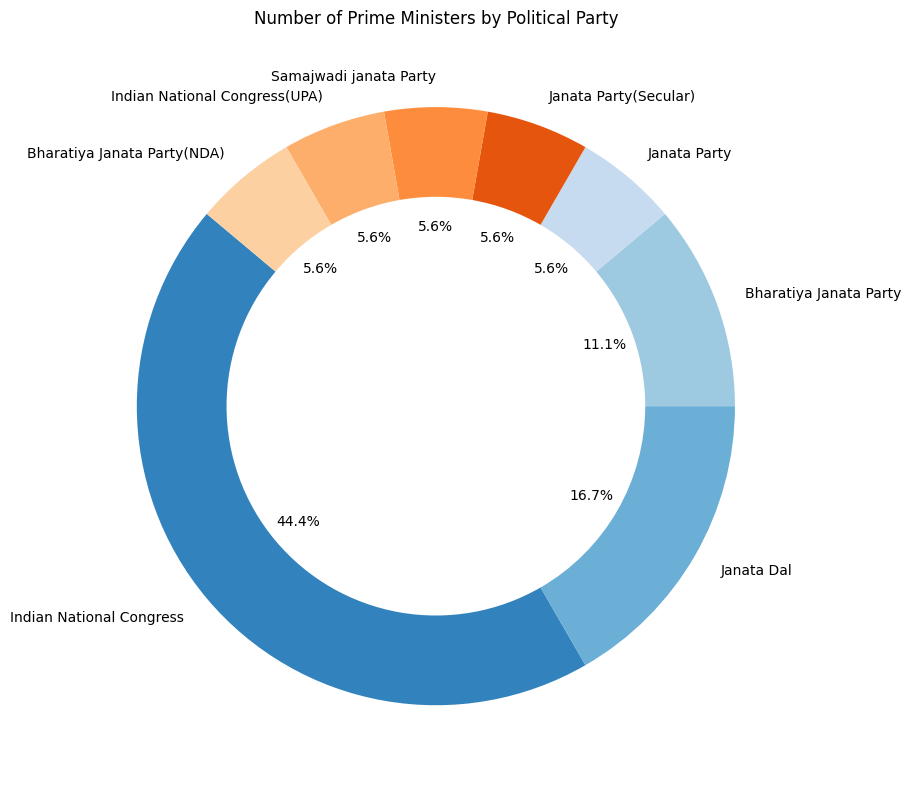

In [14]:
# Pie chart for number of Prime Ministers from each political party
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20c(range(len(party_counts)))
plt.pie(party_counts, labels=party_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Number of Prime Ministers by Political Party')
plt.tight_layout()
plt.show()


**The pie chart provides a visual representation of the number of Prime Ministers from each political party. It's evident that the Indian National Congress has had the most Prime Ministers, followed by other parties.**

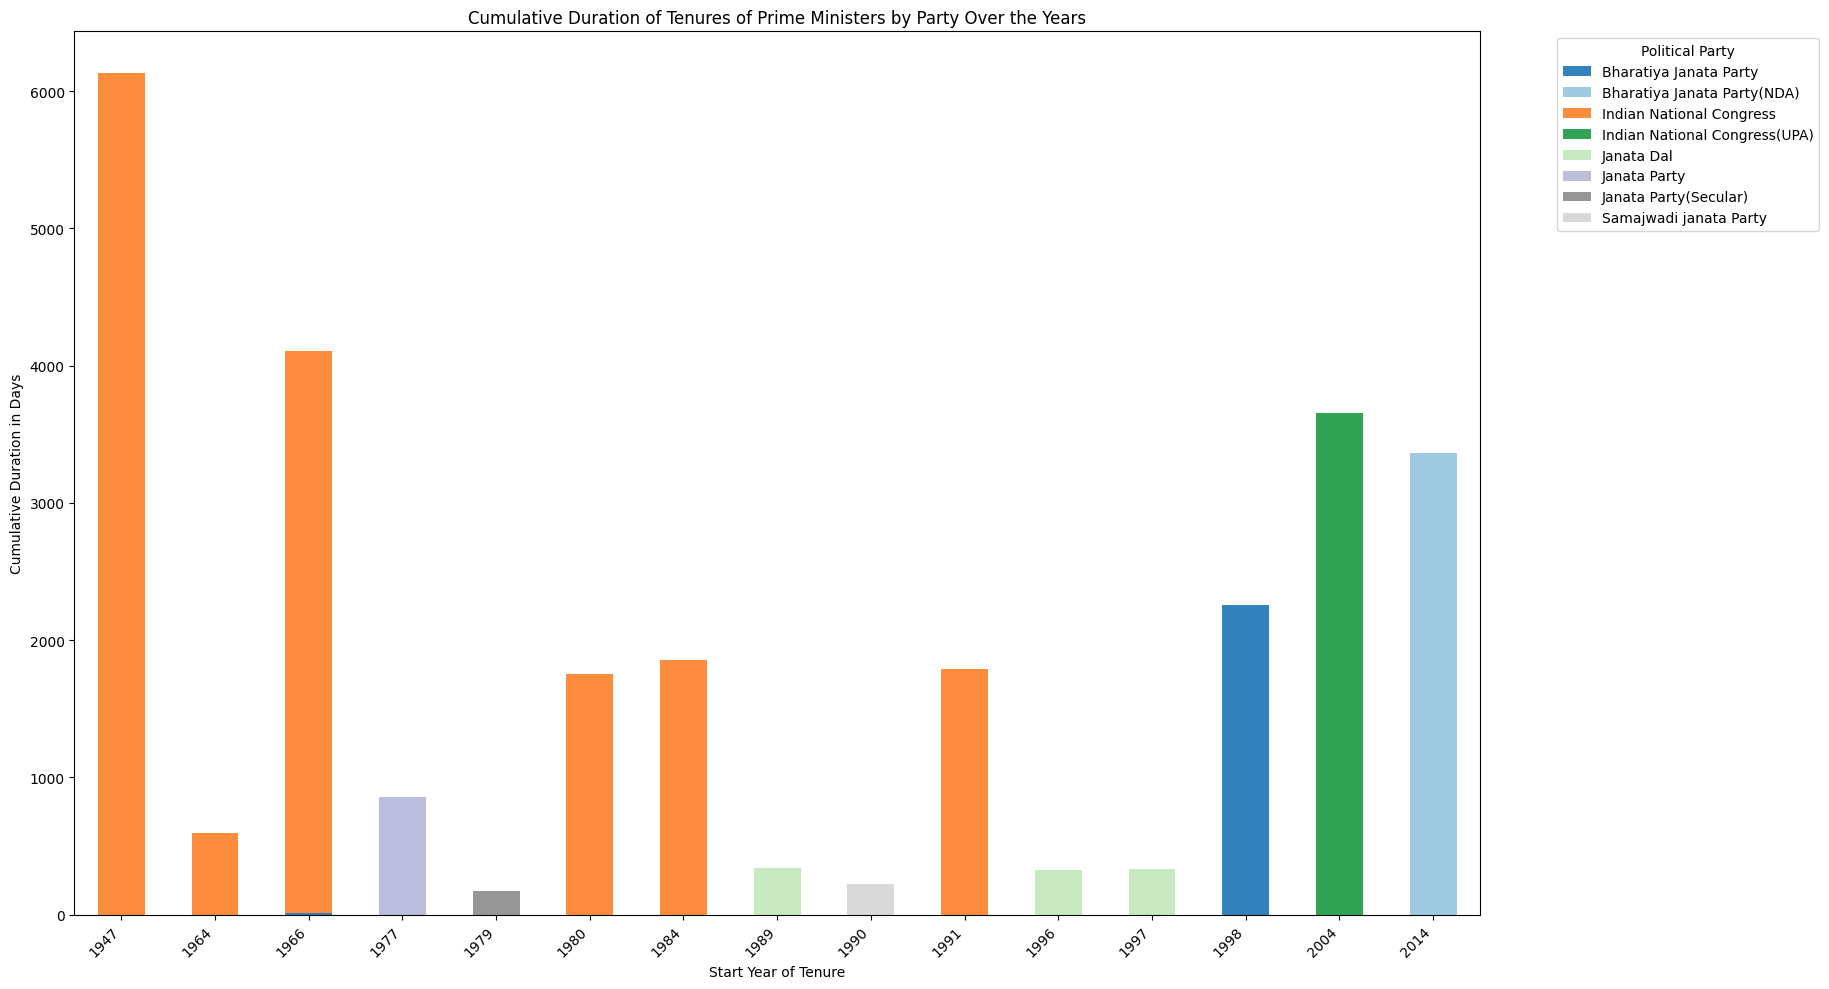

In [15]:
# Grouping by start year and political party to get cumulative duration for each year
grouped_duration = df_pm.groupby([df_pm['Start Date'].dt.year, 'Political party'])['Duration in Days'].sum().unstack().fillna(0)

# Stacked bar plot for cumulative duration of tenures over the years
grouped_duration.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20c')
plt.xlabel('Start Year of Tenure')
plt.ylabel('Cumulative Duration in Days')
plt.title('Cumulative Duration of Tenures of Prime Ministers by Party Over the Years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**The stacked bar plot visualizes the cumulative duration of tenures of Indian Prime Ministers by party over the years. Each bar represents a year when a new tenure began, and the segments of the bar denote the duration contributed by each political party. This provides insights into the dominance and contributions of different parties over various periods.**

> From the plot, we can observe the dominance of the Indian National Congress in the early years, with other parties becoming more prominent in the later years.

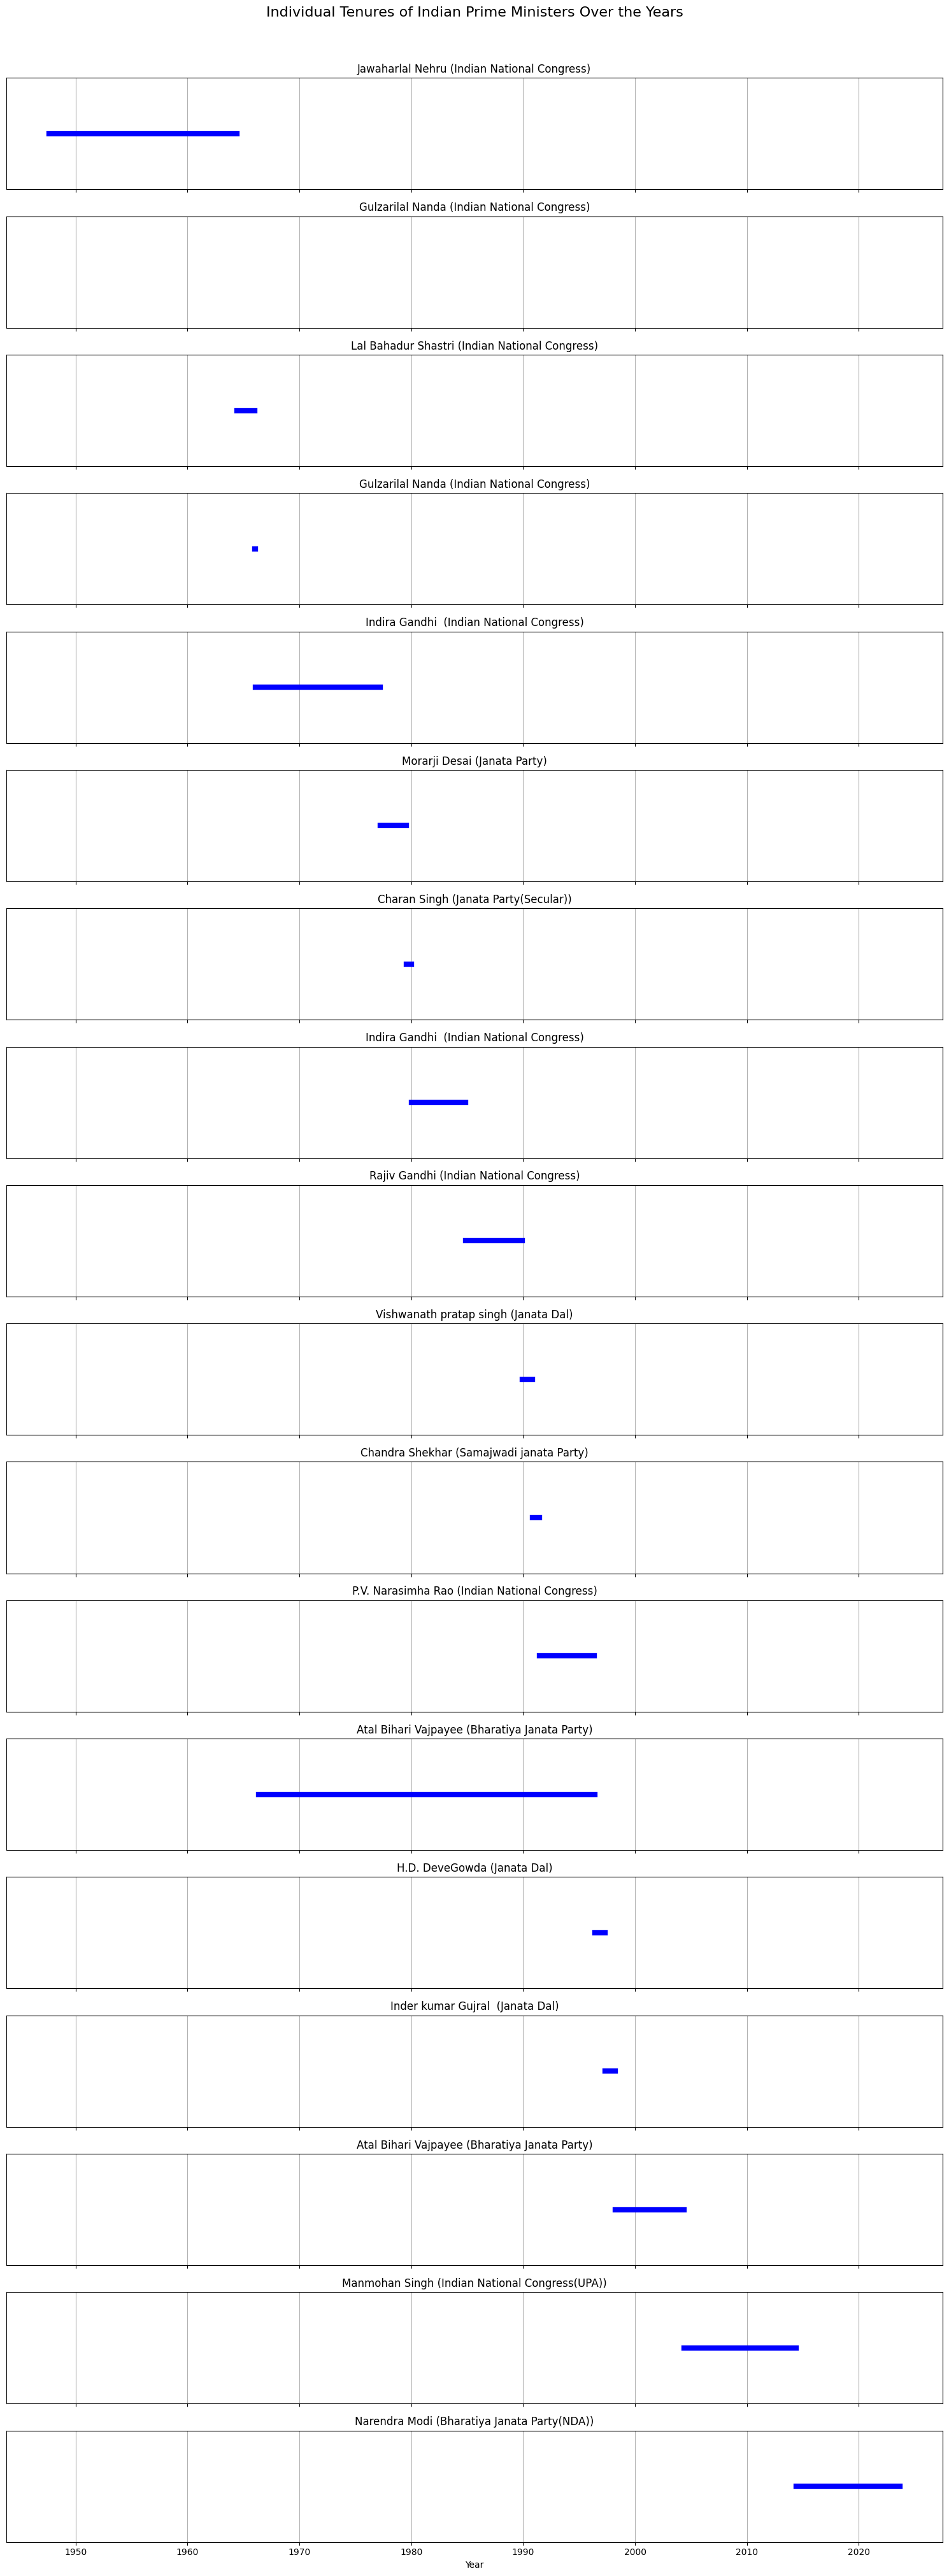

In [16]:
# Line plot with subplots for individual tenures of Prime Ministers
fig, axs = plt.subplots(len(df_pm), 1, figsize=(15, 40), sharex=True)
for index, row in df_pm.iterrows():
    axs[index].plot([row['Start Date'], row['End Date']], [1, 1], color='blue', linewidth=6)
    axs[index].set_title(row['Name'] + ' (' + row['Political party'] + ')')
    axs[index].set_yticks([])
    axs[index].grid(True)

plt.suptitle('Individual Tenures of Indian Prime Ministers Over the Years', y=1.01, fontsize=16)
plt.xlabel('Year')
plt.tight_layout()
plt.show()


**The series of line plots showcase the individual tenures of each Indian Prime Minister over the years. Each subplot represents a Prime Minister, with the line indicating their tenure duration. This visualization allows us to see overlaps, gaps, and the sequence of tenures clearly.**

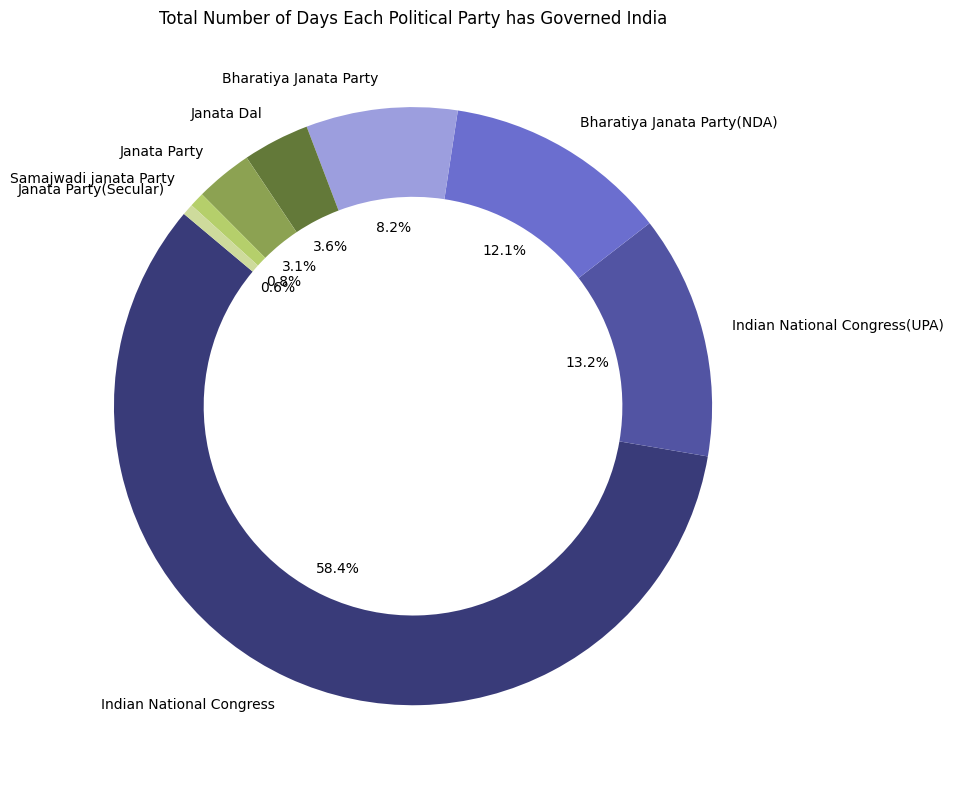

In [17]:
# Pie chart for total number of days each political party has governed
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20b(range(len(party_duration)))
plt.pie(party_duration, labels=party_duration.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Total Number of Days Each Political Party has Governed India')
plt.tight_layout()
plt.show()


**The pie chart represents the total number of days each political party has governed India. It provides insights into the cumulative dominance and contributions of different parties over the years.**

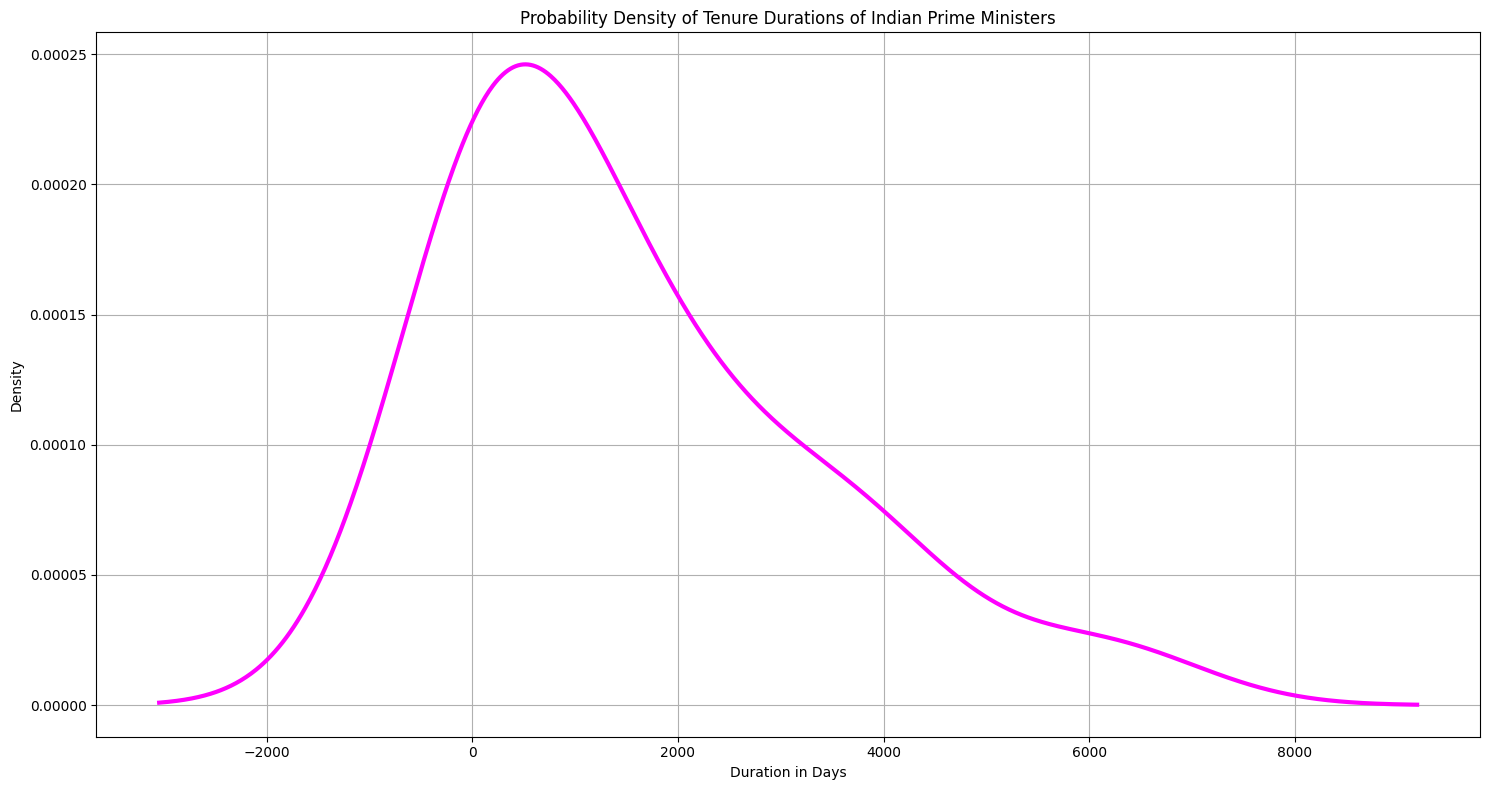

In [18]:
# Density plot for tenure durations
plt.figure(figsize=(15, 8))
df_pm['Duration in Days'].plot(kind='kde', color='magenta', linewidth=3)
plt.xlabel('Duration in Days')
plt.ylabel('Density')
plt.title('Probability Density of Tenure Durations of Indian Prime Ministers')
plt.grid(True)
plt.tight_layout()
plt.show()


**The density plot visualizes the probability density of tenure durations of Indian Prime Ministers. It provides insights into the most common tenure durations and their distribution. Peaks in the plot indicate durations that are more common, while valleys represent less frequent durations.**

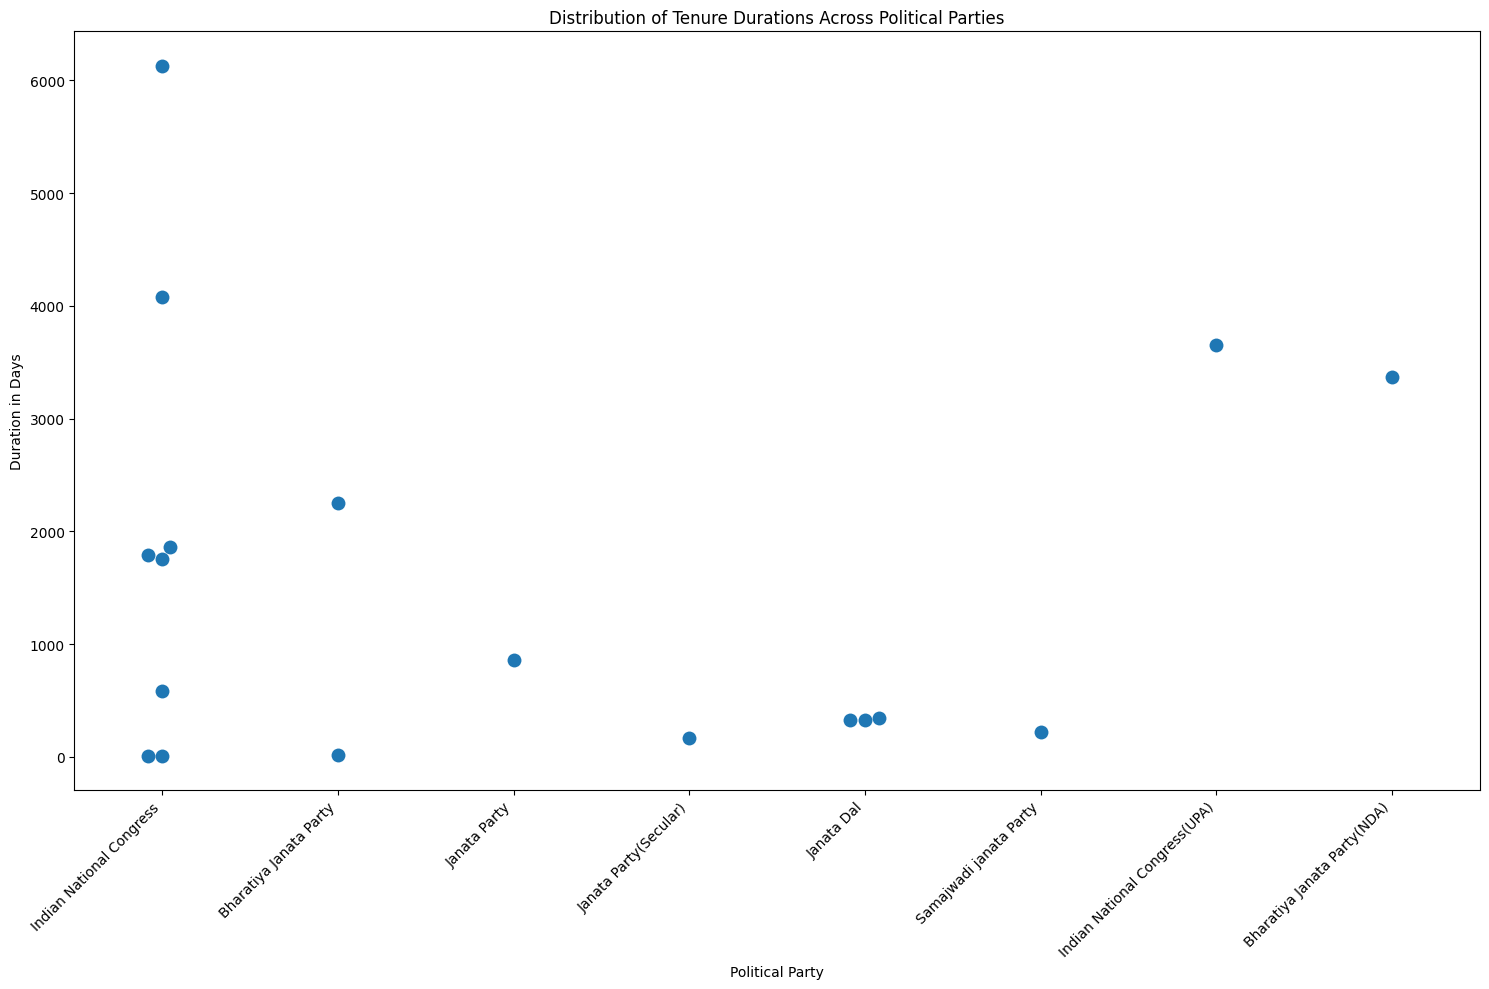

In [19]:
import seaborn as sns

# Swarm plot for distribution of tenure durations across different political parties
plt.figure(figsize=(15, 10))
sns.swarmplot(x=df_pm['Political party'], y=df_pm['Duration in Days'], size=10)
plt.ylabel('Duration in Days')
plt.xlabel('Political Party')
plt.title('Distribution of Tenure Durations Across Political Parties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The swarm plot visualizes the distribution of tenure durations across different political parties. Each point represents a Prime Minister, and the plot allows for a clear comparison of tenure durations within and across parties.**

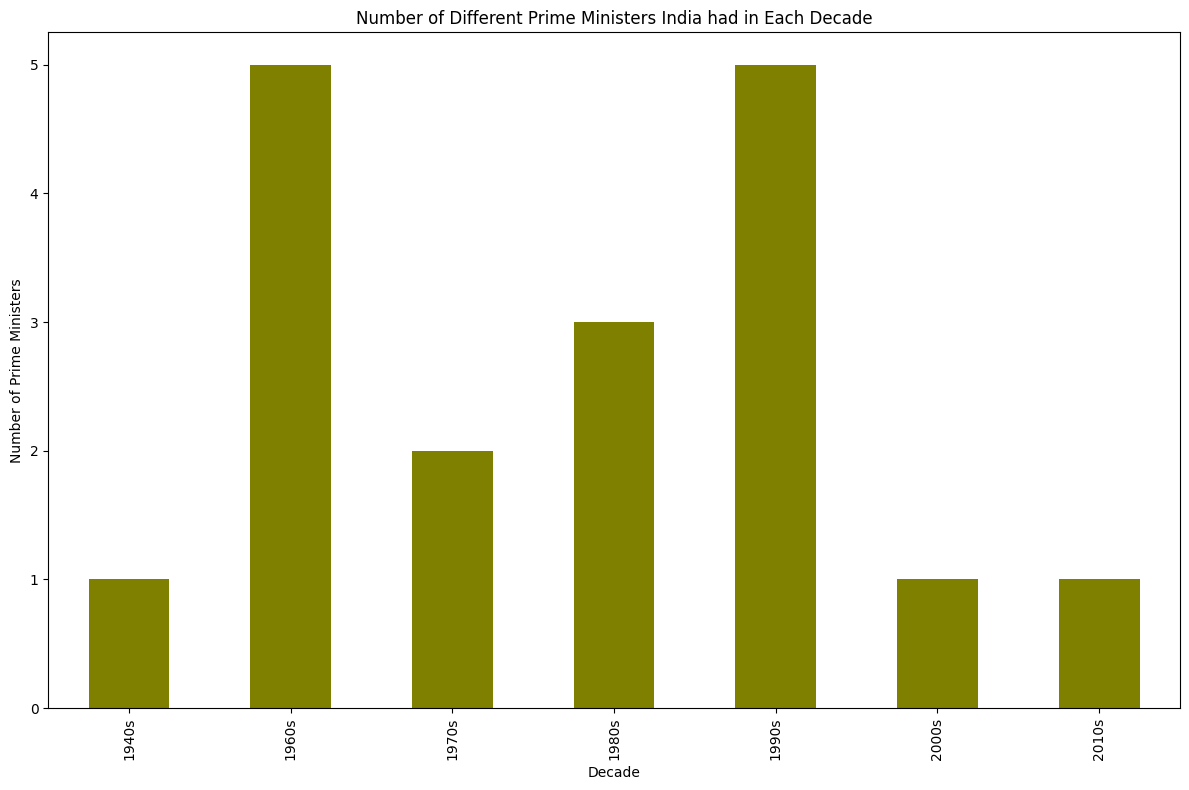

In [20]:
# Grouping by decades and counting the number of Prime Ministers
df_pm['Decade'] = (10 * (df_pm['Start Date'].dt.year // 10)).astype(str) + 's'
decade_counts = df_pm['Decade'].value_counts().sort_index()

# Bar chart for number of Prime Ministers in each decade
plt.figure(figsize=(12, 8))
decade_counts.plot(kind='bar', color='olive')
plt.ylabel('Number of Prime Ministers')
plt.xlabel('Decade')
plt.title('Number of Different Prime Ministers India had in Each Decade')
plt.tight_layout()
plt.show()


**The bar chart displays the number of different Prime Ministers India had in each decade. It offers insights into the political stability or changes during different periods. Decades with more Prime Ministers indicate times of political transitions or shifts.**

In [21]:
from collections import Counter
import re

# Extracting words from political party names
words = ' '.join(df_pm['Political party']).lower()
words = re.findall(r'\w+', words)

# Counting occurrences of each word
word_counts = Counter(words)

# Displaying the most common words
common_words = word_counts.most_common(10)
common_words


[('indian', 9),
 ('national', 9),
 ('congress', 9),
 ('janata', 9),
 ('party', 6),
 ('bharatiya', 3),
 ('dal', 3),
 ('secular', 1),
 ('samajwadi', 1),
 ('upa', 1)]

**The prevalence of words like "Indian," "National," and "Congress" is expected given the historical dominance of the Indian National Congress. The word "Janata" is also frequent, indicating the presence of various Janata Party affiliations or iterations. "Bharatiya" refers to the Bharatiya Janata Party, a major political entity in India.**

**These common words provide a glimpse into the political landscape of India and the naming conventions of its parties.**